## Load & Explore Datasets from 2017-2021


Check if they have the exact same columns

In [65]:
#import pandas
import pandas as pd

# Define the file paths for the datasets
all_files = ["PitCount_2017.csv", "PitCount_2018.csv", "PitCount_2019.csv", "PitCount_2020.csv", "PitCount_2021.csv"]

# Initialize an empty list to store column names for each dataset.
columns_list = []

# Looping through each dataset file
for file in all_files:
    # Read the dataset into a DataFrame
    df = pd.read_csv(file)
    
    # Extracting the column names and appending to the list
    columns_list.append(set(df.columns))

# Checking to see if all datasets have the same columns
if all(x == columns_list[0] for x in columns_list):
    print("All datasets have the exact same columns.")
else:
    print("Datasets have different columns.")

All datasets have the exact same columns.


Each dataset represents a different year. However, they do not have a year column. Adding a year column so that we can merge them into a unified dataset.

In [66]:
# Looping through each dataset file
for file in all_files:
    # Extracting the years from the file name
    year = int(file.split("_")[-1].split(".")[0])
    
    # Read the dataset into a DataFrame
    df = pd.read_csv(file)
    
    # Add a "Year" column with the corresponding year value
    df["Year"] = year
    
    # Saving the modified DataFrame back to the original file
    df.to_csv(file, index=False)

    print(f"Year column added to {file} and saved successfully.")


Year column added to PitCount_2017.csv and saved successfully.
Year column added to PitCount_2018.csv and saved successfully.
Year column added to PitCount_2019.csv and saved successfully.
Year column added to PitCount_2020.csv and saved successfully.
Year column added to PitCount_2021.csv and saved successfully.


#### Unify the 2017-2021 datastets.

In [67]:
# Initialize an empty list to store DataFrames
dfs = []

# Loop through each dataset file
for file in all_files:
    # Read the dataset into a DataFrame
    df = pd.read_csv(file)
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list into one
pc17_21 = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
pc17_21.head()

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth,Year
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,"1,128",170,133,825,445,678,4,...,3,9,12,0.0,21,6,15,21,0.0,2017
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,717,135,53,529,320,397,0,...,7,3,10,0.0,18,14,4,18,0.0,2017
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,"1,092",104,125,863,334,738,19,...,2,0,2,0.0,10,4,6,10,0.0,2017
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,606,116,35,455,222,383,1,...,3,9,12,0.0,18,6,12,18,0.0,2017
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,155,0,8,147,72,81,0,...,0,0,0,0.0,0,0,0,0,0.0,2017


##### Explore the newly created dataset pc17_21

In [68]:
# Check the shape of the merged dataset.
pc17_21.shape

(1940, 543)

### Null values.

In [69]:
# Get the count of null values for each column.
null_counts = pc17_21.isnull().sum()

# Print columns with null values and their respective counts
print("Columns with null values")
for c, null_count in null_counts.items():
    if null_count > 0:
        print(f"{c}: {null_count} null values")

Columns with null values
CoC Number: 10 null values
CoC Name: 10 null values
Count Types: 19 null values
Overall Homeless: 10 null values
Overall Homeless - Under 18: 10 null values
Overall Homeless - Age 18 to 24: 10 null values
Overall Homeless - Over 24: 10 null values
Overall Homeless - Female: 10 null values
Overall Homeless - Male: 10 null values
Overall Homeless - Transgender: 10 null values
Overall Homeless - Gender that is not Singularly Female or Male: 10 null values
Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x): 10 null values
Overall Homeless - Hispanic/Latin(o)(a)(x): 10 null values
Overall Homeless - White: 10 null values
Overall Homeless - Black, African American, or African: 10 null values
Overall Homeless - Asian or Asian American: 10 null values
Overall Homeless - American Indian, Alaska Native, or Indigenous: 10 null values
Overall Homeless - Native Hawaiian or Other Pacific Islander: 10 null values
Overall Homeless - Multiple Races: 10 null values
Sheltered ES 

#### Presence of null values per row.

In [70]:
def count_rows_with_nulls_above_threshold(data, threshold):
    # Count the number of null values in each row
    null_counts = data.isnull().sum(axis=1)
    # Count the number of rows with null values equal or above the threshold
    rows_above_threshold = (null_counts >= threshold).sum()
    return rows_above_threshold

# Define the thresholds
thresholds = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500, 520, 530, 541, 543]

# Iterate through the thresholds and count rows with null values above each threshold
for threshold in thresholds:
    rows_above_threshold = count_rows_with_nulls_above_threshold(pc17_21, threshold)
    print(f"Number of rows with more than or equal to {threshold} null values: {rows_above_threshold}")



Number of rows with more than or equal to 2 null values: 76
Number of rows with more than or equal to 5 null values: 64
Number of rows with more than or equal to 10 null values: 55
Number of rows with more than or equal to 20 null values: 52
Number of rows with more than or equal to 30 null values: 49
Number of rows with more than or equal to 40 null values: 49
Number of rows with more than or equal to 50 null values: 47
Number of rows with more than or equal to 60 null values: 45
Number of rows with more than or equal to 70 null values: 40
Number of rows with more than or equal to 80 null values: 40
Number of rows with more than or equal to 90 null values: 38
Number of rows with more than or equal to 100 null values: 10
Number of rows with more than or equal to 150 null values: 10
Number of rows with more than or equal to 200 null values: 10
Number of rows with more than or equal to 300 null values: 10
Number of rows with more than or equal to 400 null values: 10
Number of rows with m

The goal is to keep as much data as possible as each row represents a CoC.

Explore the dynamics of the null values in CoC Name and Overall Homeless columns.

In [71]:
# Condition 1: Both 'CoC Name' and 'Overall Homeless' are NaN
both_nan = pc17_21[pc17_21['CoC Name'].isnull() & pc17_21['Overall Homeless'].isnull()]
num_both_nan = len(both_nan)

# Condition 2: 'CoC Name' is NaN
coc_name_nan = pc17_21[pc17_21['CoC Name'].isnull()]
num_coc_name_nan = len(coc_name_nan)

# Condition 3: 'Overall Homeless' is NaN
overall_homeless_nan = pc17_21[pc17_21['Overall Homeless'].isnull()]
num_overall_homeless_nan = len(overall_homeless_nan)

# Print the number of rows for each condition
print(f"Number of rows with both 'CoC Name' and 'Overall Homeless' as NaN: {num_both_nan}")
print(f"Number of rows with 'CoC Name' as NaN: {num_coc_name_nan}")
print(f"Number of rows with 'Overall Homeless' as NaN: {num_overall_homeless_nan}")

# Print the rows for each condition
print("Rows with both 'CoC Name' and 'Overall Homeless' as NaN:")
print(both_nan)

print("\nRows with 'CoC Name' as NaN:")
print(coc_name_nan)

print("\nRows with 'Overall Homeless' as NaN:")
print(overall_homeless_nan)

Number of rows with both 'CoC Name' and 'Overall Homeless' as NaN: 10
Number of rows with 'CoC Name' as NaN: 10
Number of rows with 'Overall Homeless' as NaN: 10
Rows with both 'CoC Name' and 'Overall Homeless' as NaN:
                                             CoC Number CoC Name Count Types  \
386                                                 NaN      NaN         NaN   
387   a MO-604 covers territory in both Missouri and...      NaN         NaN   
774                                                 NaN      NaN         NaN   
775   a MO-604 covers territory in both Missouri and...      NaN         NaN   
1161                                                NaN      NaN         NaN   
1162  a MO-604 covers territory in both Missouri and...      NaN         NaN   
1549                                                NaN      NaN         NaN   
1550  a MO-604 covers territory in both Missouri and...      NaN         NaN   
1938                                                NaN      

There are the same 10 rows that are missing CoC Name and Overall Homeless, drop these rows.

In [72]:
# Identify rows where both 'CoC Name' and 'Overall Homeless' are NaN
both_nan = pc17_21['CoC Name'].isnull() & pc17_21['Overall Homeless'].isnull()

# Drop these rows from the DataFrame
pc17_21 = pc17_21.drop(pc17_21[both_nan].index)

pc17_21.shape

(1930, 543)

Recheck the null values. Make sure CoC Name and Overall Homeless columns do not have.

In [73]:
# Get the count of null values for each column
null_counts2 = pc17_21.isnull().sum()

# Print columns with null values and their respective counts
print("Columns with null values:")
for column, null_count in null_counts2.items():
    if null_count > 0:
        print(f"{column}: {null_count} null values")

Columns with null values:
CoC Number: 5 null values
Count Types: 9 null values
Unsheltered Homeless - Under 18: 32 null values
Unsheltered Homeless - Age 18 to 24: 35 null values
Unsheltered Homeless - Over 24: 35 null values
Unsheltered Homeless - Female: 34 null values
Unsheltered Homeless - Male: 34 null values
Unsheltered Homeless - Transgender: 35 null values
Unsheltered Homeless - Gender that is not Singularly Female or Male: 34 null values
Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x): 36 null values
Unsheltered Homeless - Hispanic/Latin(o)(a)(x): 35 null values
Unsheltered Homeless - White: 35 null values
Unsheltered Homeless - Black, African American, or African: 35 null values
Unsheltered Homeless - Asian or Asian American: 35 null values
Unsheltered Homeless - American Indian, Alaska Native, or Indigenous: 35 null values
Unsheltered Homeless - Native Hawaiian or Other Pacific Islander: 35 null values
Unsheltered Homeless - Multiple Races: 34 null values
Unsheltered 

No null values found in the CoC Name and Overall Homeless columns.

#### Dtypes: Dealing with Numeric Values

In [74]:
pc17_21.head()

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth,Year
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,"1,128",170,133,825,445,678,4,...,3,9,12,0.0,21,6,15,21,0.0,2017
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,717,135,53,529,320,397,0,...,7,3,10,0.0,18,14,4,18,0.0,2017
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,"1,092",104,125,863,334,738,19,...,2,0,2,0.0,10,4,6,10,0.0,2017
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,606,116,35,455,222,383,1,...,3,9,12,0.0,18,6,12,18,0.0,2017
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,155,0,8,147,72,81,0,...,0,0,0,0.0,0,0,0,0,0.0,2017


Check to see if columns with numerical values have a different dtype.

In [75]:
null_columns = pc17_21.columns[pc17_21.isnull().any()]

# Filter columns with null values that are numeric type
column_types = pc17_21.dtypes[3:]

# Check if all the data types are either int or float
if all(dtype in [int, float, 'int64', 'float64'] for dtype in column_types):
    print("All columns starting from Overall Homeless column are int or float.")
else:
    print('Dtype other than float of int.')

Dtype other than float of int.


Explore the unique values in these columns.

In [76]:
#Select all the columns starting from "Overall Homeless."
columns_unique = pc17_21.columns[pc17_21.columns.get_loc("Overall Homeless"):]

#Get unique values for each of these columns
unique_values = {c: pc17_21[c].unique() for c in columns_unique}

#Print unique_values
print(unique_values)

{'Overall Homeless': array(['1,128', '717', '1,092', ..., '86', '263', '380,630'], dtype=object), 'Overall Homeless - Under 18': array(['170', '135', '104', '116', '0', '85', '59', '24', '38', '102',
       '92', '57', '63', '33', '20', '220', '204', '1,183', '1,136',
       '448', '480', '370', '297', '160', '535', '124', '378', '32',
       '243', '343', '263', '78', '184', '128', '131', '52', '113', '118',
       '4', '84', '77', '35', '97', '11', '4,791', '1,055', '758', '295',
       '119', '141', '76', '178', '286', '99', '62', '103', '849',
       '1,033', '282', '219', '517', '2,286', '240', '164', '317', '261',
       '133', '79', '189', '450', '117', '577', '310', '86', '95', '174',
       '122', '58', '768', '269', '80', '42', '207', '64', '304', '843',
       '48', '37', '17', '105', '127', '350', '496', '1,079', '89', '650',
       '90', '107', '336', '46', '66', '44', '71', '65', '55', '1,207',
       '172', '39', '83', '41', '14', '67', '22', '112', '860', '69',
       '

We see that there a commas being used to separate the numbers at the thousand level. Going to replace all the commas after the third column.

In [77]:
# Function to remove commas and convert to float
def remove_commas_and_convert_to_float(value):
    if pd.isnull(value):
        return value
    else:
        try:
            return float(value.replace(',', ''))
        except AttributeError:  # Handling the case if it's already a float
            return value
        
# Apply the function to columns starting from the fourth column
for col in pc17_21.columns[3:]:
    pc17_21[col] = pc17_21[col].apply(remove_commas_and_convert_to_float)

Get the dtypes for these columns.

In [78]:
# Check if all columns after the third one are of type float or int
are_numeric = all(pc17_21.dtypes[i] in [float, int] for i in range(3, len(pc17_21.columns)))

# Print the result
print("All columns after the third are float or int:", are_numeric)

All columns after the third are float or int: True


## Exploratory Analysis - Visual & SQL

#### Sections to explore:
1. Overall Homeless Population
2. Overall Homeless by Age Group - Gender - Ethnicity - Race
3. The chronically homeless.

1. Overall Homeless Population

/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_15958/3104022163.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Overall Homeless', data=pc17_21, ci=None)  # ci=None disables error bars


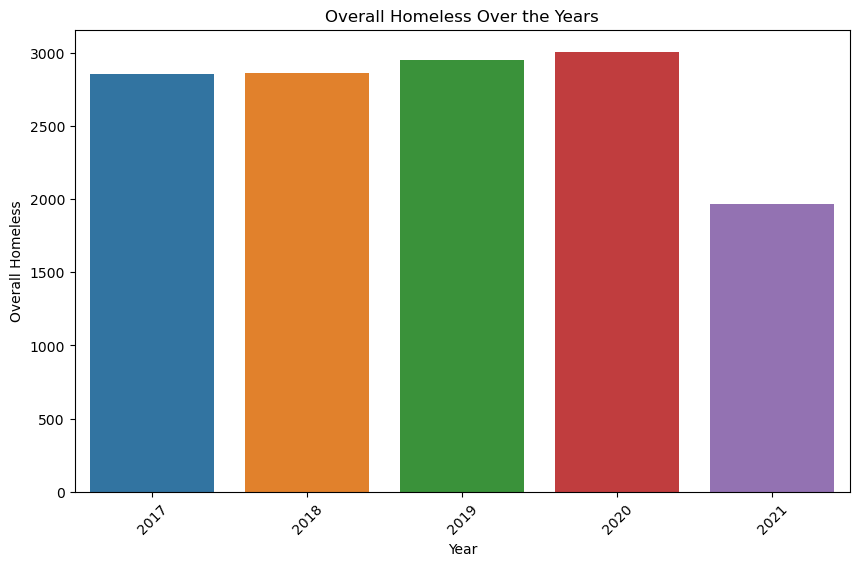

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Year', y='Overall Homeless', data=pc17_21, ci=None)  # ci=None disables error bars

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years')
plt.xlabel('Year')
plt.ylabel('Overall Homeless')

# Save image
plt.savefig('overall_homeless.png')

# Show plot
plt.show()


2. Overall Homeless by Age Group

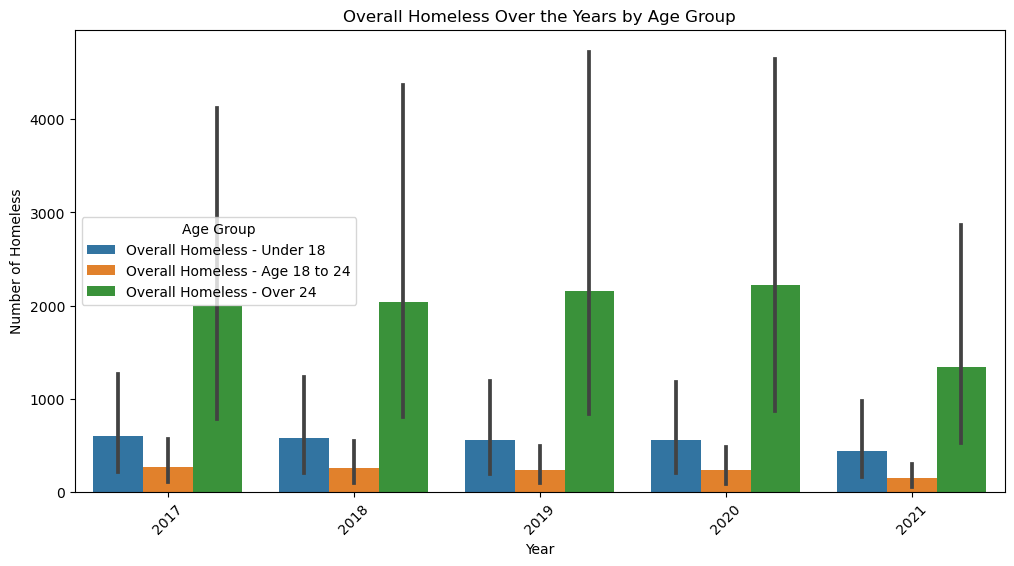

In [80]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - Under 18', 
                                'Overall Homeless - Age 18 to 24', 
                                'Overall Homeless - Over 24'], 
                    var_name='Age Group', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x='Year', y='Number of Homeless', hue='Age Group', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Age Group')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Age Group')
plt.show()

3. Overall Homeless by Gender

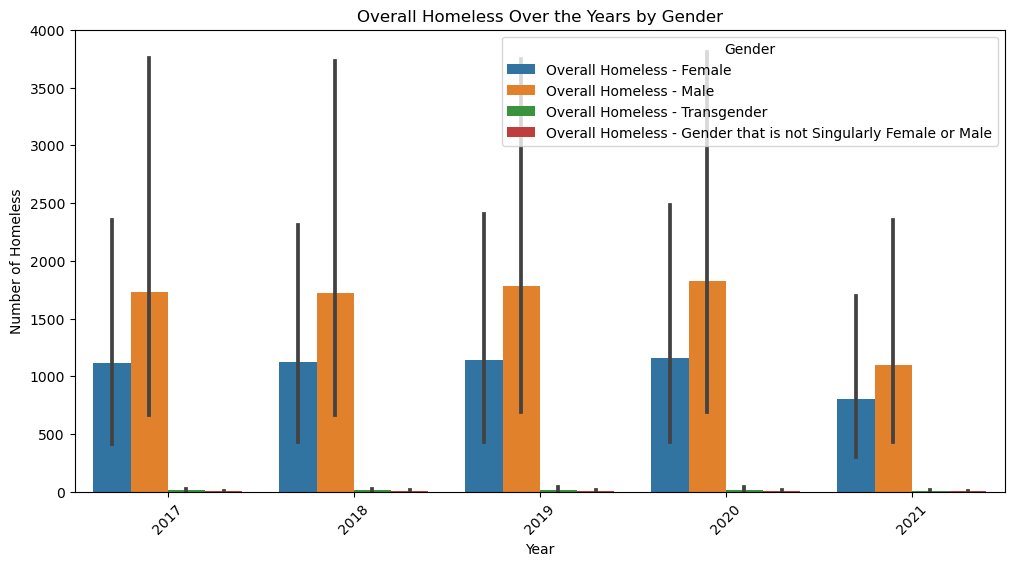

In [81]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - Female', 
                                'Overall Homeless - Male', 
                                'Overall Homeless - Transgender',
                                'Overall Homeless - Gender that is not Singularly Female or Male'], 
                    var_name='Gender', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x='Year', y='Number of Homeless', hue='Gender', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Gender')
plt.show()

4. Overall Homeless by Ethnicity

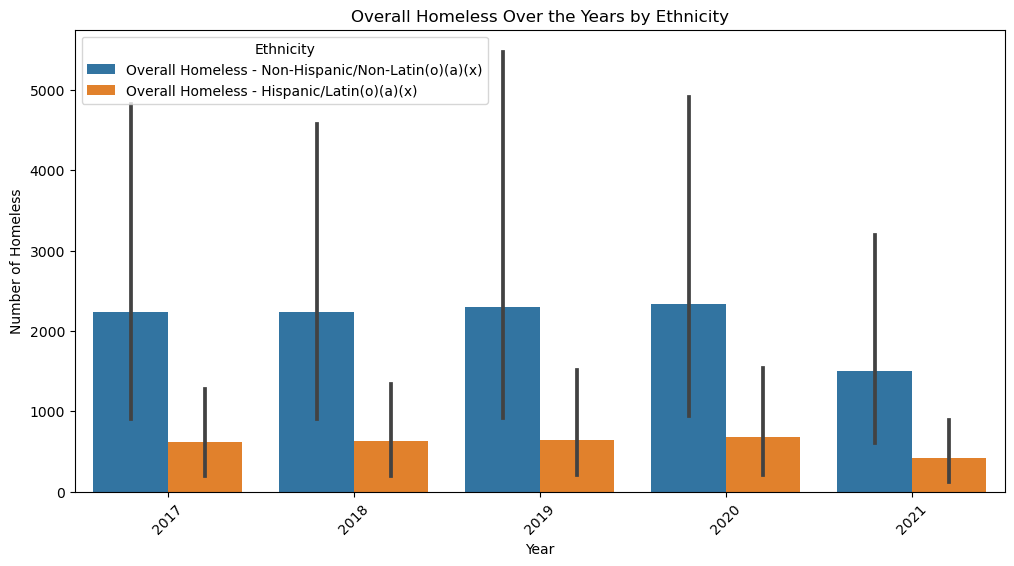

In [82]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)', 
                                'Overall Homeless - Hispanic/Latin(o)(a)(x)'], 
                    var_name='Ethnicity', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x
            ='Year', y='Number of Homeless', hue='Ethnicity', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Ethnicity')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Ethnicity')
plt.show()

5. Overall Homeless by Race

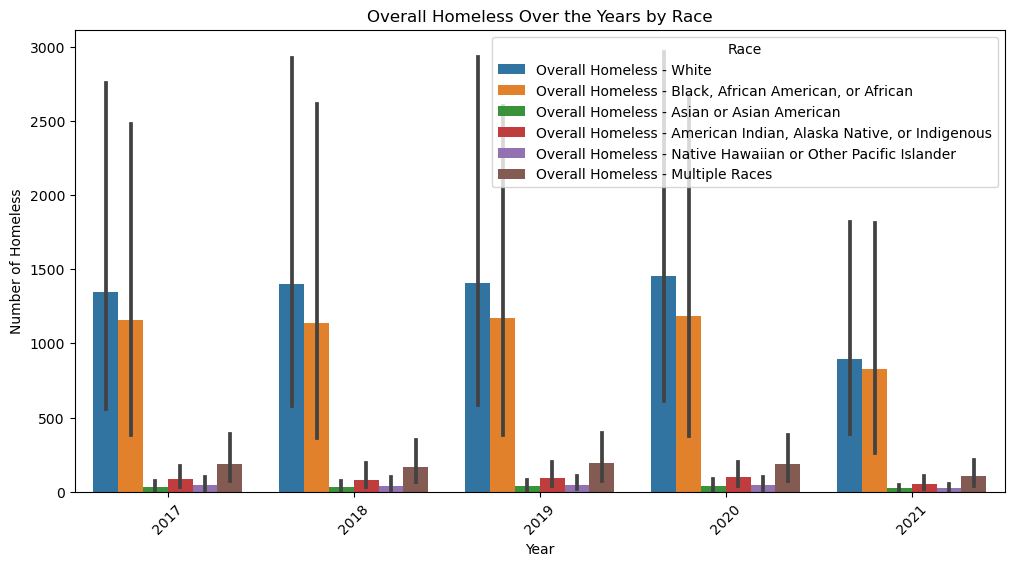

In [83]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - White', 
                                'Overall Homeless - Black, African American, or African',
                                'Overall Homeless - Asian or Asian American',
                                'Overall Homeless - American Indian, Alaska Native, or Indigenous',
                                'Overall Homeless - Native Hawaiian or Other Pacific Islander',
                                'Overall Homeless - Multiple Races'], 
                    var_name='Race', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x='Year', y='Number of Homeless', hue='Race', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Race')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Race')
plt.show()

6. Overall Chronically Homeless

/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_15958/2659038855.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Overall Chronically Homeless', data=pc17_21, ci=None)  # ci=None disables error bars


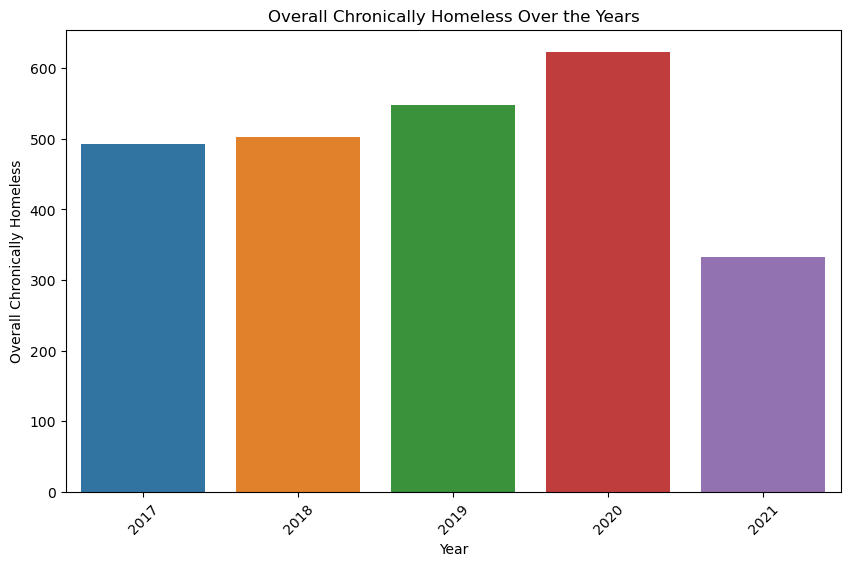

In [84]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Year', y='Overall Chronically Homeless', data=pc17_21, ci=None)  # ci=None disables error bars

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Chronically Homeless Over the Years')
plt.xlabel('Year')
plt.ylabel('Overall Chronically Homeless')

# Save the image
plt.savefig('chronically_homeless_17_21.png')

# Show plot
plt.show()

Observations:
1. Across all the visualizations we see a downward trend in the number of homeless people on the street. 
2. We know that homelessness is a bigger problem today than ever before. 
3. The downward trend is probably due to the Covid-19 pandemic. Will have to bring in more data to create a clear picture.

## Bring in all the datasets available.

Steps:
1. Clean the datasets.
    - Make sure there are no commas in the numeric columns.
    - Nulls values
2. Check which columns are similar across the board.
3. Combine the datasets.
4. Add "State" column in all the datasets based on the CoC Name.
5. Create unique datasets:
    - Dataset that contains columns common in all the datasets, for indepth analysis of all the years PIT Count was conducted.
    - Dataset specific to Chronically Homeless.
6. Do Visualizations on Tableau.



In [85]:
# Define the list of files
all_files = ["PitCount_2007.csv", "PitCount_2008.csv", "PitCount_2009.csv", "PitCount_2010.csv", "PitCount_2011.csv","PitCount_2012.csv","PitCount_2013.csv","PitCount_2014.csv","PitCount_2015.csv","PitCount_2016.csv","PitCount_2022.csv","PitCount_2023.csv"]

# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Replace commas in each cell from "Overall Homeless" up to the last column excluding "Year"
    df.loc[:, "Overall Homeless":df.columns[-2]] = df.loc[:, "Overall Homeless":df.columns[-2]].replace(',', '', regex=True)
    
    # Convert columns from "Overall Homeless" up to the last column excluding "Year" to float
    df.loc[:, "Overall Homeless":df.columns[-2]] = df.loc[:, "Overall Homeless":df.columns[-2]].astype(float)
    
    # Add a "Year" column if it doesn't exist and insert the year based on the name of the dataset
    year = int(file.split("_")[1].split(".")[0])
    df["Year"] = year
    
    # Write the modified DataFrame back to CSV
    df.to_csv(file, index=False)

Check to see the Dtypes of all the columns.

In [86]:
# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Print the data types of columns starting from "Overall Homeless"
    print("Data Types of Columns starting from 'Overall Homeless' in", file)
    print(df.loc[:,:].dtypes)
    print()

Data Types of Columns starting from 'Overall Homeless' in PitCount_2007.csv
CoC Number                                           object
CoC Name                                             object
Overall Homeless                                    float64
Sheltered ES Homeless                               float64
Sheltered TH Homeless                               float64
Sheltered Total Homeless                            float64
Unsheltered Homeless                                float64
Overall Homeless Individuals                        float64
Sheltered ES Homeless Individuals                   float64
Sheltered TH Homeless Individuals                   float64
Sheltered Total Homeless Individuals                float64
Unsheltered Homeless Individuals                    float64
Overall Homeless People in Families                 float64
Sheltered ES Homeless People in Families            float64
Sheltered TH Homeless People in Families            float64
Sheltered Total Homeless

Check how many Common columns between all the datasets.

In [87]:
# Initialize a set to store column names
common_columns = set(pc17_21.columns)

# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Find common columns between the current dataset and pc17_21 dataset
    common_columns = common_columns.intersection(set(df.columns))

# Print common columns
if len(common_columns) > 0:
    print("Common columns among all the datasets are:")
    for col in common_columns:
        print(col)
else:
    print("There are no common columns between pc17_21 and other datasets.")

Common columns among all the datasets are:
Sheltered ES Homeless
Overall Homeless People in Families
Sheltered TH Homeless Family Households
Unsheltered Homeless Individuals
Sheltered Total Homeless Individuals
Sheltered TH Homeless People in Families
Unsheltered Homeless Family Households
Sheltered Total Homeless Family Households
Sheltered Total Homeless People in Families
Unsheltered Homeless
CoC Number
Unsheltered Chronically Homeless Individuals
CoC Name
Year
Sheltered Total Homeless
Sheltered TH Homeless Individuals
Overall Homeless Family Households
Sheltered TH Homeless
Sheltered ES Homeless People in Families
Overall Homeless Individuals
Overall Homeless
Overall Chronically Homeless Individuals
Unsheltered Homeless People in Families
Sheltered Total Chronically Homeless Individuals
Sheltered ES Homeless Individuals
Sheltered ES Homeless Family Households


### Null Values

In [88]:
# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Check for null values
    null_columns = df.columns[df.isnull().any()]
    
    # Print columns with null values along with the dataset name
    if len(null_columns) > 0:
        print(f"In file {file}, the following columns have null values:")
        for col in null_columns:
            print(col)
    else:
        print(f"In file {file}, there are no null values.")

In file PitCount_2007.csv, there are no null values.
In file PitCount_2008.csv, the following columns have null values:
CoC Number
CoC Name
In file PitCount_2009.csv, the following columns have null values:
Count Types
In file PitCount_2010.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2011.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2012.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2013.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2014.csv, the following columns have null values:
Count Types
In file PitCount_2015.csv, the following columns have null values:
Count Types
In file PitCount_2016.csv, the following columns have null values:
Count Types
In file PitCount_2022.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2023.csv, the following columns 

Dealing with Null values from column CoC Number and CoC Name
- Combine all the dataset: 2007 - 2023
- Drop rows with NaN in CoC Name & Overall Homeless using the same method as before.

This will help with us not loosing so many datapoints.

Combine all the datasets.

In [89]:
# Initialize the combined dataset with pc17_21
PitCount_07_23 = pc17_21.copy()

# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Merge the datasets based on common columns
    PitCount_07_23 = pd.merge(PitCount_07_23, df, how='outer')

# Save the combined dataset
PitCount_07_23.to_csv("PC_07_23.csv", index=False)


In [90]:
for i in PitCount_07_23.columns:
    print(i)

CoC Number
CoC Name
Count Types
Overall Homeless
Overall Homeless - Under 18
Overall Homeless - Age 18 to 24
Overall Homeless - Over 24
Overall Homeless - Female
Overall Homeless - Male
Overall Homeless - Transgender
Overall Homeless - Gender that is not Singularly Female or Male
Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)
Overall Homeless - Hispanic/Latin(o)(a)(x)
Overall Homeless - White
Overall Homeless - Black, African American, or African
Overall Homeless - Asian or Asian American
Overall Homeless - American Indian, Alaska Native, or Indigenous
Overall Homeless - Native Hawaiian or Other Pacific Islander
Overall Homeless - Multiple Races
Sheltered ES Homeless
Sheltered ES Homeless - Under 18
Sheltered ES Homeless - Age 18 to 24
Sheltered ES Homeless - Over 24
Sheltered ES Homeless - Female
Sheltered ES Homeless - Male
Sheltered ES Homeless - Transgender
Sheltered ES Homeless - Gender that is not Singularly Female or Male
Sheltered ES Homeless - Non-Hispanic/Non-Latin(o)(a)(

In [91]:
PitCount_07_23.head()

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,1128.0,170.0,133.0,825.0,445.0,678.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,717.0,135.0,53.0,529.0,320.0,397.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,1092.0,104.0,125.0,863.0,334.0,738.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,606.0,116.0,35.0,455.0,222.0,383.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,155.0,0.0,8.0,147.0,72.0,81.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
PitCount_07_23.shape

(6543, 663)

In [93]:
PitCount_07_23.isnull().sum()

CoC Number                                                  19
CoC Name                                                    20
Count Types                                                805
Overall Homeless                                             0
Overall Homeless - Under 18                               2303
                                                          ... 
Unsheltered Homeless People in Families - Age 25 to 34    6154
Unsheltered Homeless People in Families - Age 35 to 44    6154
Unsheltered Homeless People in Families - Age 45 to 54    6154
Unsheltered Homeless People in Families - Age 55 to 64    6154
Unsheltered Homeless People in Families - Over 64         6154
Length: 663, dtype: int64

Bring "Year" column to the right of Count Types

In [94]:
# Get the current list of columns
cols = list(PitCount_07_23.columns)

# Remove 'Year' from its current position
cols.remove('Year')

# Find the index of 'Count Types' and insert 'Year' right after it
count_types_index = cols.index('Count Types')
cols.insert(count_types_index + 1, 'Year')

# Reorder the DataFrame according to the new list of columns
PitCount_07_23 = PitCount_07_23[cols]

PitCount_07_23.head()

,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,170.0,133.0,825.0,445.0,678.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,135.0,53.0,529.0,320.0,397.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,104.0,125.0,863.0,334.0,738.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,116.0,35.0,455.0,222.0,383.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,0.0,8.0,147.0,72.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dealing with null values in this new dataset. Use the same method as before.

In [95]:
# Condition 1: Both 'CoC Name' is NaN and 'Overall Homeless' is 0.0
both_nan = PitCount_07_23[(PitCount_07_23['CoC Name'].isnull()) & (PitCount_07_23['Overall Homeless'] == 0.0)]
num_both_nan = len(both_nan)

# Condition 2: 'CoC Name' is NaN
coc_name_nan = PitCount_07_23[PitCount_07_23['CoC Name'].isnull()]
num_coc_name_nan = len(coc_name_nan)

# Condition 3: 'Overall Homeless' is 0.0
overall_homeless_zero = PitCount_07_23[PitCount_07_23['Overall Homeless'] == 0.0]
num_overall_homeless_zero = len(overall_homeless_zero)

# Print the number of rows for each condition
print(f"Number of rows with both 'CoC Name' as NaN and 'Overall Homeless' as 0.0: {num_both_nan}")
print(f"Number of rows with 'CoC Name' as NaN: {num_coc_name_nan}")
print(f"Number of rows with 'Overall Homeless' as 0.0: {num_overall_homeless_zero}")

# Print the rows for each condition
print("Rows with both 'CoC Name' as NaN and 'Overall Homeless' as 0.0:")
print(both_nan)

print("\nRows with 'CoC Name' as NaN:")
print(coc_name_nan)

print("\nRows with 'Overall Homeless' as 0.0:")
print(overall_homeless_zero)


Number of rows with both 'CoC Name' as NaN and 'Overall Homeless' as 0.0: 20
Number of rows with 'CoC Name' as NaN: 20
Number of rows with 'Overall Homeless' as 0.0: 20
Rows with both 'CoC Name' as NaN and 'Overall Homeless' as 0.0:
                                             CoC Number CoC Name Count Types  \
2697                                                NaN      NaN         NaN   
2698  a MO-604 covers territory in both Missouri and...      NaN         NaN   
3464                                                NaN      NaN         NaN   
3465  a MO-604 covers territory in both Missouri and...      NaN         NaN   
3847                                                NaN      NaN         NaN   
3848                                                NaN      NaN         NaN   
3849  a MO-604 covers territory in both Missouri and...      NaN         NaN   
4230                                                NaN      NaN         NaN   
4231                                           

NaN rows for Overall Homeless and CoC Name are the same. Drop the NaN

In [96]:
PitCount_07_23 = PitCount_07_23.drop(both_nan.index)

# Optionally, print the DataFrame to confirm that rows are dropped
PitCount_07_23.shape

(6523, 663)

In [97]:
PitCount_07_23.isnull().sum()

CoC Number                                                   7
CoC Name                                                     0
Count Types                                                785
Year                                                         0
Overall Homeless                                             0
                                                          ... 
Unsheltered Homeless People in Families - Age 25 to 34    6138
Unsheltered Homeless People in Families - Age 35 to 44    6138
Unsheltered Homeless People in Families - Age 45 to 54    6138
Unsheltered Homeless People in Families - Age 55 to 64    6138
Unsheltered Homeless People in Families - Over 64         6138
Length: 663, dtype: int64

Deal with null values in CoC Number

In [98]:
# Filter rows where 'CoC Number' is null
coc_number_nan = PitCount_07_23[PitCount_07_23['CoC Number'].isnull()]

# Print the rows with null values in the 'CoC Number' column
coc_name_nan.head(10)

,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
2697,NaN,NaN,NaN,2008,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2698,a MO-604 covers territory in both Missouri and...,NaN,NaN,2008,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3464,NaN,NaN,NaN,2010,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3465,a MO-604 covers territory in both Missouri and...,NaN,NaN,2010,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3847,NaN,NaN,NaN,2011,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3848,NaN,NaN,NaN,2011,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3849,a MO-604 covers territory in both Missouri and...,NaN,NaN,2011,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4230,NaN,NaN,NaN,2012,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4231,NaN,NaN,NaN,2012,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4232,a MO-604 covers territory in both Missouri and...,NaN,NaN,2012,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop rows where CoC Number is null. 

In [99]:
PitCount_07_23 = PitCount_07_23.dropna(subset= "CoC Number")

PitCount_07_23.isnull().sum()

CoC Number                                                   0
CoC Name                                                     0
Count Types                                                778
Year                                                         0
Overall Homeless                                             0
                                                          ... 
Unsheltered Homeless People in Families - Age 25 to 34    6131
Unsheltered Homeless People in Families - Age 35 to 44    6131
Unsheltered Homeless People in Families - Age 45 to 54    6131
Unsheltered Homeless People in Families - Age 55 to 64    6131
Unsheltered Homeless People in Families - Over 64         6131
Length: 663, dtype: int64

Explore column Count Types

In [100]:
PitCount_07_23['Count Types'].unique()

array(['Sheltered and Unsheltered Count', nan, 'Sheltered-Only Count',
       'aa', 'Sheltered and Partial Unsheltered Count',
       'No 2010 PIT Count', 'Sheltered-Only Count*'], dtype=object)

#### Null values in the Count Type column.

We see that while the Count Type == "No 2010 PIT Coun" we still see values in the Overall Homeless columns and others. CHECK if these rows have the same Overall Homeless numbers as last year. If so then drop these columns.

In [101]:

no_2010_pit_count_values = PitCount_07_23[PitCount_07_23['Count Types'] == 'No 2010 PIT Count']

no_2010_pit_count_values.shape

(85, 663)

In [102]:
no_2010_pit_count_values.head()

,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
3083,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",No 2010 PIT Count,2010,2273.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3091,AR-500,Little Rock/Central Arkansas CoC,No 2010 PIT Count,2010,1425.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3093,AR-504,Delta Hills CoC,No 2010 PIT Count,2010,969.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3094,AR-505,Southeast Arkansas CoC,No 2010 PIT Count,2010,51.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3099,CA-500,San Jose/Santa Clara City & County CoC,No 2010 PIT Count,2010,7086.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Make sure the Year column in 2010 for no_2010_pit_count_values.

In [103]:
#find unique values for the column "Year"
no_2010_pit_count_values['Year'].unique().sum()

2010

While Count Type values == "No 2010 PIT Count" there are still values in the Overall Homeless column section.

Check to see if these numbers are the same from the previous year?

In [104]:

# Create List_2010 with specified filters
list_2010 = PitCount_07_23[(PitCount_07_23['Count Types'] == "No 2010 PIT Count") & (PitCount_07_23['Year'] == 2010)]
list_2010 = list_2010[['CoC Name', 'CoC Number', 'Count Types', 'Year', 'Overall Homeless']]

# Create list_2009 with specified filters
list_2009 = PitCount_07_23[PitCount_07_23['Year'] == 2009]
list_2009 = list_2009[['CoC Name', 'CoC Number', 'Count Types', 'Year', 'Overall Homeless']]

# Function to compare 'Overall Homeless' values
def compare_homeless_values(list_2010, list_2009):
    # Merge the two lists on CoC Name and CoC Number
    merged = pd.merge(list_2010, list_2009, on=['CoC Name', 'CoC Number'], suffixes=('_2010', '_2009'))
    # Check if Overall Homeless values are the same
    merged['Comparison'] = merged['Overall Homeless_2010'] == merged['Overall Homeless_2009']
    
    # Print the comparison results
    for index, row in merged.iterrows():
        if row['Comparison']:
            print("They are the same values")
        else:
            print("Not the same values")
    
    # Return rows that did not match
    return merged[merged['Comparison'] == False]

# Run the function and capture the unmatched rows
unmatched_rows = compare_homeless_values(list_2010, list_2009)

# Print the unmatched rows
print(unmatched_rows[['CoC Name', 'CoC Number', 'Overall Homeless_2010', 'Overall Homeless_2009']])


They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values
They are the same values


Looks like for many counties in 2010 they did not conduct the PIT Count and they used their 2009 numbers.

Making sure the 'merged' dataset was created accurately.

In [105]:
merged = pd.merge(list_2010, list_2009, on=['CoC Name', 'CoC Number'], suffixes=('_2010', '_2009'))

merged.head()

,CoC Name,CoC Number,Count Types_2010,Year_2010,Overall Homeless_2010,Count Types_2009,Year_2009,Overall Homeless_2009
0,"Birmingham/Jefferson, St. Clair, Shelby Counti...",AL-500,No 2010 PIT Count,2010,2273.0,Sheltered and Unsheltered Count,2009,2273.0
1,Little Rock/Central Arkansas CoC,AR-500,No 2010 PIT Count,2010,1425.0,Sheltered and Unsheltered Count,2009,1425.0
2,Delta Hills CoC,AR-504,No 2010 PIT Count,2010,969.0,Sheltered and Unsheltered Count,2009,969.0
3,Southeast Arkansas CoC,AR-505,No 2010 PIT Count,2010,51.0,Sheltered and Unsheltered Count,2009,51.0
4,San Jose/Santa Clara City & County CoC,CA-500,No 2010 PIT Count,2010,7086.0,Sheltered and Unsheltered Count,2009,7086.0


This is a very good finding. Will keep these 2010 values intact.

In [106]:
PitCount_07_23['Count Types'].unique()

array(['Sheltered and Unsheltered Count', nan, 'Sheltered-Only Count',
       'aa', 'Sheltered and Partial Unsheltered Count',
       'No 2010 PIT Count', 'Sheltered-Only Count*'], dtype=object)

Explore where Count Type == 'aa'

In [107]:
#Creating a variable that only contains Count Tpyes == 'aa'
aa_count_types = PitCount_07_23[PitCount_07_23['Count Types'] == 'aa']

#print the rows.
aa_count_types.head()

,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
1543,AK-500,Anchorage CoC,aa,2021,1319.0,156.0,220.0,943.0,414.0,900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check the same CoC Name from last year.

In [108]:
#Creating a variable that contains CoC Name 'Anchorage CoC' and Year == 2020
anchorage_coc = PitCount_07_23[PitCount_07_23['CoC Name'] == 'Anchorage CoC']

#print the rows.
anchorage_coc.head()

,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,170.0,133.0,825.0,445.0,678.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2018,1094.0,169.0,116.0,809.0,452.0,635.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2019,1111.0,193.0,132.0,786.0,422.0,685.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1157,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2020,1058.0,150.0,129.0,779.0,419.0,636.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543,AK-500,Anchorage CoC,aa,2021,1319.0,156.0,220.0,943.0,414.0,900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Anchorage CoC for 2020 has Count Type == Sheltered and Unsheltered Count
Also checked the raw dataset. No explanation of 'aa' as Count Type found.
Replacing 'aa' with 'Sheltered and Unsheltered Count'

In [109]:
#Replace 'aa' with 'Sheltered and Unsheltered Count'
PitCount_07_23['Count Types'] = PitCount_07_23['Count Types'].replace('aa', 'Sheltered and Unsheltered Count')

#check if the value has been replaced.
check_coc = PitCount_07_23[PitCount_07_23['CoC Name'] == 'Anchorage CoC']

check_coc.head()


,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,170.0,133.0,825.0,445.0,678.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2018,1094.0,169.0,116.0,809.0,452.0,635.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2019,1111.0,193.0,132.0,786.0,422.0,685.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1157,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2020,1058.0,150.0,129.0,779.0,419.0,636.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1543,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2021,1319.0,156.0,220.0,943.0,414.0,900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
#Recheck the unique values in 'Count Types'
PitCount_07_23['Count Types'].unique()

array(['Sheltered and Unsheltered Count', nan, 'Sheltered-Only Count',
       'Sheltered and Partial Unsheltered Count', 'No 2010 PIT Count',
       'Sheltered-Only Count*'], dtype=object)

Explore where Count Types == 'Sheltered-Only Count*'

In [111]:
unique_shelered_only_count = PitCount_07_23[PitCount_07_23['Count Types'] == 'Sheltered-Only Count*']

print(unique_shelered_only_count.shape)
print(unique_shelered_only_count['Year'].unique())
unique_shelered_only_count.head()

(22, 663)
[2023]


,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
6173,CA-501,San Francisco CoC,Sheltered-Only Count*,2023,7582.0,414.0,1087.0,NaN,2503.0,4691.0,...,103.0,72.0,33.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0
6174,CA-502,"Oakland, Berkeley/Alameda County CoC",Sheltered-Only Count*,2023,9759.0,592.0,814.0,NaN,3592.0,6037.0,...,78.0,51.0,21.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0
6175,CA-503,Sacramento City & County CoC,Sheltered-Only Count*,2023,9281.0,713.0,621.0,NaN,3082.0,6006.0,...,127.0,90.0,39.0,8.0,6.0,0.0,0.0,0.0,0.0,0.0
6178,CA-506,"Salinas/Monterey, San Benito Counties CoC",Sheltered-Only Count*,2023,2212.0,121.0,223.0,NaN,579.0,1600.0,...,22.0,29.0,11.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
6179,CA-507,Marin County CoC,Sheltered-Only Count*,2023,1118.0,145.0,140.0,NaN,429.0,665.0,...,20.0,24.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The 'Sheltered-Only Count*' is only there in the 2023 dataset.

Upon reading the post notes on the raw dataset. It states that "* File does not contain the imputed ages for people experiencing unsheltered homelessness over age 24 for the 22 CoCs that did not conduct an unsheltered count in 2023."

This is an interesting finding for data analysis we could just replace these with values with the simple 'Sheltered-Only Count' as on the root level these CoC did only conduct a Sheltered-Only Count.

In [112]:
# Replace Sheltered-Only Count* with Sheltered-Only Count
PitCount_07_23['Count Types'] = PitCount_07_23['Count Types'].replace('Sheltered-Only Count*', 'Sheltered-Only Count')

PitCount_07_23['Count Types'].unique()


array(['Sheltered and Unsheltered Count', nan, 'Sheltered-Only Count',
       'Sheltered and Partial Unsheltered Count', 'No 2010 PIT Count'],
      dtype=object)

Exploring NaN values in the Count Type column.

In [113]:
nan_count_type = PitCount_07_23[PitCount_07_23['Count Types'].isna()] 

print(nan_count_type.shape)

nan_count_type.head()


(778, 663)


,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
166,MD-514,Maryland Balance of State CoC,NaN,2017,1446.0,302.0,104.0,1040.0,587.0,854.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,MD-514,Maryland Balance of State CoC,NaN,2018,1420.0,321.0,97.0,1002.0,558.0,851.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,MD-514,Maryland Balance of State CoC,NaN,2019,1352.0,262.0,87.0,1003.0,521.0,818.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1324,MD-514,Maryland Balance of State CoC,NaN,2020,1264.0,280.0,80.0,904.0,511.0,737.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,AK-500,Anchorage CoC,NaN,2007,974.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Going to fill NaN in Count Type by looking at the same CoC Name from previous year and filling the nan with that year's value.

Using the ranking system:

If the Count Type == Nan
Then
- Check and see the same CoC Name and CoC Number of the previous and following Year and if they have the same Count Type then insert the Count Type in the NaN.
- ELSEIF either of the year is == Sheltered and Unsheltered Count then insert that value into the NaN. 
- ELSEIF either of the year is ==  Sheltered and Partial Unsheltered Count then insert that value into the NaN.
- ELSEIF either of the year is == Sheltered-Only Count then insert this into the NaN.


In [114]:
def fill_count_type(row):
    # Check previous and next year within the same CoC Name and CoC Number
    prev_year = PitCount_07_23[(PitCount_07_23['CoC Name'] == row['CoC Name']) & 
                               (PitCount_07_23['CoC Number'] == row['CoC Number']) & 
                               (PitCount_07_23['Year'] == row['Year'] - 1)]
    next_year = PitCount_07_23[(PitCount_07_23['CoC Name'] == row['CoC Name']) & 
                               (PitCount_07_23['CoC Number'] == row['CoC Number']) & 
                               (PitCount_07_23['Year'] == row['Year'] + 1)]
    
    # Check if previous and next year have the same Count Type
    if not prev_year.empty and not next_year.empty and prev_year.iloc[0]['Count Types'] == next_year.iloc[0]['Count Types']:
        return prev_year.iloc[0]['Count Types']
    
    # Check specific conditions in sequence
    for year in [prev_year, next_year]:
        if not year.empty:
            if year.iloc[0]['Count Types'] == 'Sheltered and Unsheltered Count':
                return 'Sheltered and Unsheltered Count'
            elif year.iloc[0]['Count Types'] == 'Sheltered and Partial Unsheltered Count':
                return 'Sheltered and Partial Unsheltered Count'
            elif year.iloc[0]['Count Types'] == 'Sheltered-Only Count':
                return 'Sheltered-Only Count'
    
    return row['Count Types']  # Return original if no change

# Apply the function
PitCount_07_23['Count Types'] = PitCount_07_23.apply(fill_count_type, axis=1)

PitCount_07_23['Count Types'].unique()


array(['Sheltered and Unsheltered Count', 'Sheltered-Only Count', nan,
       'Sheltered and Partial Unsheltered Count'], dtype=object)

In [115]:
#Select all the NaN rows in Count Types
nan_count_type_2 = PitCount_07_23[PitCount_07_23['Count Types'].isna()]

#Print the shape
nan_count_type_2.shape

(398, 663)

Reduced NaN values by half.

Impute the remaining NaN cells in Count Types with the mean of that specific CoC Name.

In [116]:
#import numpy
import numpy as np

# Define a function to fill NaN with the mode of 'Count Type' for the same CoC Name and CoC Number
def fill_with_mode(df):
    # Calculate the mode for each group
    mode_series = df.groupby(['CoC Name', 'CoC Number'])['Count Types'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    # Map the mode back to the original dataframe
    df['Count Types'] = df.apply(
        lambda row: mode_series[(row['CoC Name'], row['CoC Number'])] if pd.isna(row['Count Types']) else row['Count Types'], axis=1
    )
    return df

# Apply the function to fill NaN values
PitCount_07_23 = fill_with_mode(PitCount_07_23)

#Get unique values of the Count Types column.
print(PitCount_07_23['Count Types'].unique())

['Sheltered and Unsheltered Count' 'Sheltered-Only Count'
 'Sheltered and Partial Unsheltered Count' nan]


Check to see how many more NaN left in the dataset.

In [117]:
#Select all the NaN rows in Count Types
nan_count_type_3 = PitCount_07_23[PitCount_07_23['Count Types'].isna()]

#Prin the shape
print(nan_count_type_3.shape)

nan_count_type_3.head()


(5, 663)


,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
1947,AR-509,Hot Springs/South West Arkansas CoC,NaN,2007,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948,AR-510,"Hempstead, Sevier, Howard, Little River Counti...",NaN,2007,322.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2086,MA-514,Framingham/Waltham CoC,NaN,2007,747.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2208,NY-609,Putnam County CoC,NaN,2007,31.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2468,MA-514,Framingham/Waltham CoC,NaN,2008,636.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check to see if thee CoC Name and Coc Number appear in any other row in the dataset.

In [118]:
# Extract CoC Names and CoC Numbers that have NaN in 'Count Types'
coc_names_with_nan = nan_count_type_3['CoC Name']
coc_numbers_with_nan = nan_count_type_3['CoC Number']

# Check if these CoC Names or CoC Numbers appear more than once in the dataset
if not PitCount_07_23[(PitCount_07_23['CoC Name'].isin(coc_names_with_nan) | 
                       PitCount_07_23['CoC Number'].isin(coc_numbers_with_nan)) & 
                       ~PitCount_07_23.index.isin(nan_count_type_3.index)].empty:
    print("There are other entries with the same CoC Names or CoC Numbers.")
else:
    print("These CoCs do not appear more than once.")

These CoCs do not appear more than once.


Replace these NaN values in Count Types column with the mode of the column.

In [119]:
# Find the most frequent value (mode) in the 'Count Types' column
most_frequent_count_type = PitCount_07_23['Count Types'].mode()[0]

# Replace NaN values in the 'Count Types' column with the most frequent value
PitCount_07_23['Count Types'] = PitCount_07_23['Count Types'].fillna(most_frequent_count_type)

# Print the mode of count types.
print(most_frequent_count_type)

# Check the updated DataFrame
print(PitCount_07_23['Count Types'].unique())

Sheltered and Unsheltered Count
['Sheltered and Unsheltered Count' 'Sheltered-Only Count'
 'Sheltered and Partial Unsheltered Count']


1. Bringing the year column before Overall Homeless column.
2. Adding a state column and retriving that data from the CoC Number column. This will be used for visualization on a US Maps on Tableau.

In [120]:
# Remove the "Year" column from its current position
year_column = PitCount_07_23.pop("Year")

# Convert the "Year" column to integer type
year_column = year_column.astype(int)

# Insert the "Year" column right before the "Overall Homeless" column
overall_homeless_index = PitCount_07_23.columns.get_loc("Overall Homeless")
PitCount_07_23.insert(overall_homeless_index, "Year", year_column)

PitCount_07_23.head()


,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,170.0,133.0,825.0,445.0,678.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,135.0,53.0,529.0,320.0,397.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,104.0,125.0,863.0,334.0,738.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,116.0,35.0,455.0,222.0,383.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,0.0,8.0,147.0,72.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Add State Column using CoC Number

In [121]:
# Check the unique values on CoC Number to see if there are other location than state.
PitCount_07_23['CoC Number'].unique()

array(['AK-500', 'AK-501', 'AL-500', 'AL-501', 'AL-502', 'AL-503',
       'AL-504', 'AL-505', 'AL-506', 'AL-507', 'AR-500', 'AR-501',
       'AR-503', 'AR-505', 'AR-508', 'AZ-500', 'AZ-501', 'AZ-502',
       'CA-500', 'CA-501', 'CA-502', 'CA-503', 'CA-504', 'CA-505',
       'CA-506', 'CA-507', 'CA-508', 'CA-509', 'CA-510', 'CA-511',
       'CA-512', 'CA-513', 'CA-514', 'CA-515', 'CA-516', 'CA-517',
       'CA-518', 'CA-519', 'CA-520', 'CA-521', 'CA-522', 'CA-523',
       'CA-524', 'CA-525', 'CA-526', 'CA-527', 'CA-529', 'CA-530',
       'CA-600', 'CA-601', 'CA-602', 'CA-603', 'CA-604', 'CA-606',
       'CA-607', 'CA-608', 'CA-609', 'CA-611', 'CA-612', 'CA-613',
       'CA-614', 'CO-500', 'CO-503', 'CO-504', 'CT-503', 'CT-505',
       'DC-500', 'DE-500', 'FL-500', 'FL-501', 'FL-502', 'FL-503',
       'FL-504', 'FL-505', 'FL-506', 'FL-507', 'FL-508', 'FL-509',
       'FL-510', 'FL-511', 'FL-512', 'FL-513', 'FL-514', 'FL-515',
       'FL-517', 'FL-518', 'FL-519', 'FL-520', 'FL-600', 'FL-6

Must include the US Territories in the list as well.

In [122]:
# Define a dictionary mapping state abbreviations to full state names
state_territoies_map = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming",
    "DC": "District of Columbia",  # District of Columbia
    "AS": "American Samoa", "GU": "Guam", "MP": "Northern Mariana Islands", "PR": "Puerto Rico", "VI": "Virgin Islands"  # US Territories
}   


# Extract state abbreviation from "CoC Number" column
PitCount_07_23['State_Territory'] = PitCount_07_23['CoC Number'].str.split('-', expand=True)[0]

# Map state abbreviation to full state name
PitCount_07_23['State_Territory'] = PitCount_07_23['State_Territory'].map(state_territoies_map)

#Move the state column to the front of the dataset.
# Remove the "State" column from its current position
state_column = PitCount_07_23.pop("State_Territory")

# Find the index of the "CoC Number" column
coc_number_index = PitCount_07_23.columns.get_loc("CoC Number")

# Insert the "State" column right before the "CoC Number" column
PitCount_07_23.insert(coc_number_index, "State_Territory", state_column)

# Display the dataset with the new "State" column
PitCount_07_23.head()


,State_Territory,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,Alaska,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,170.0,133.0,825.0,445.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,135.0,53.0,529.0,320.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,104.0,125.0,863.0,334.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,116.0,35.0,455.0,222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,0.0,8.0,147.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
PitCount_07_23['State_Territory'].isnull().sum()

0

Keep the CoC Number column and remove based on any specific model created.

## Explore the Unified Dataset 

### Capture a better view of the crisis of homelessness.

/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_15958/251073313.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Overall Homeless', data=PitCount_07_23, palette=palette, ci=None)  # ci=None disables error bars


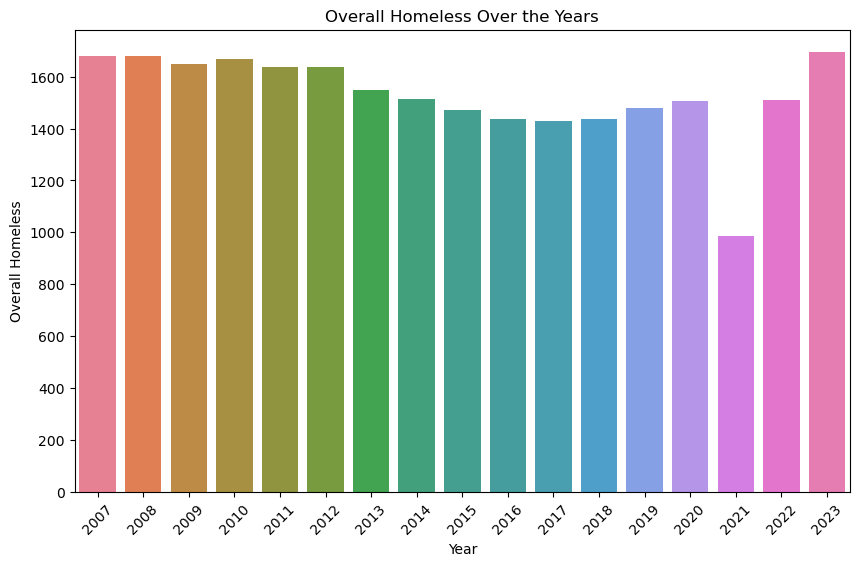

In [124]:
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the bar plot
palette = sns.color_palette("husl", n_colors=PitCount_07_23['Year'].nunique())  # 'husl' provides vibrant colors
sns.barplot(x='Year', y='Overall Homeless', data=PitCount_07_23, palette=palette, ci=None)  # ci=None disables error bars

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years')
plt.xlabel('Year')
plt.ylabel('Overall Homeless')

# Save the figure
plt.savefig('overall_homeless_07_23.png')

# Show the plot
plt.show()

This dataset provide a better view of the crisis of homelessness. 

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/p

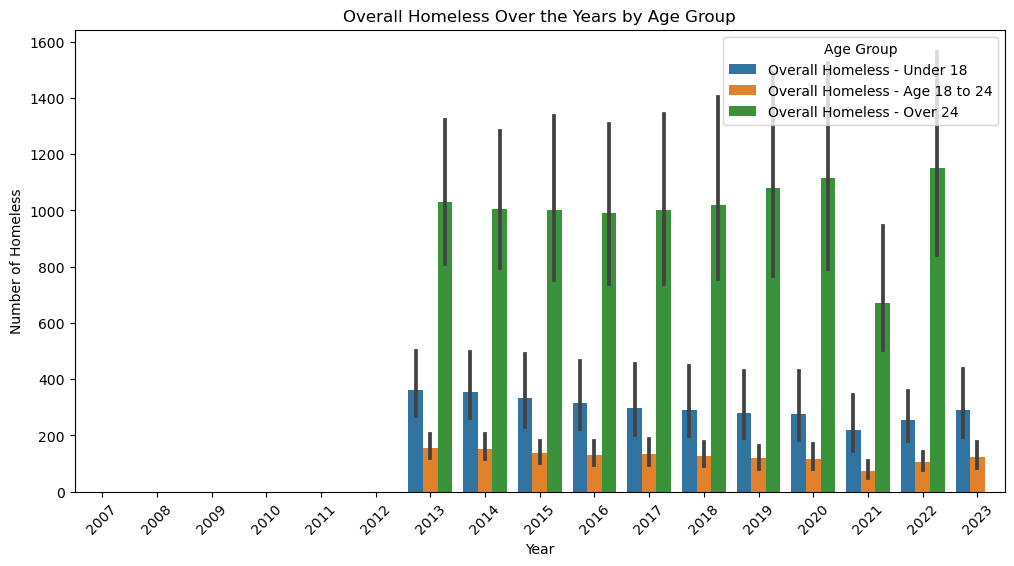

In [125]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = PitCount_07_23.melt(id_vars=['Year'], 
                         value_vars=['Overall Homeless - Under 18', 
                                     'Overall Homeless - Age 18 to 24', 
                                     'Overall Homeless - Over 24'], 
                         var_name='Age Group', 
                         value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x='Year', y='Number of Homeless', hue='Age Group', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Age Group')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Display the legend with a title
plt.legend(title='Age Group')

# Show the plot
plt.show()

The age specific homeless count did not began until 2013. This visualization also shows a more accurate representation of the growth in homeless population.

/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_15958/3050256270.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Overall Chronically Homeless', data=PitCount_07_23, ci=None)  # ci=None disables error bars


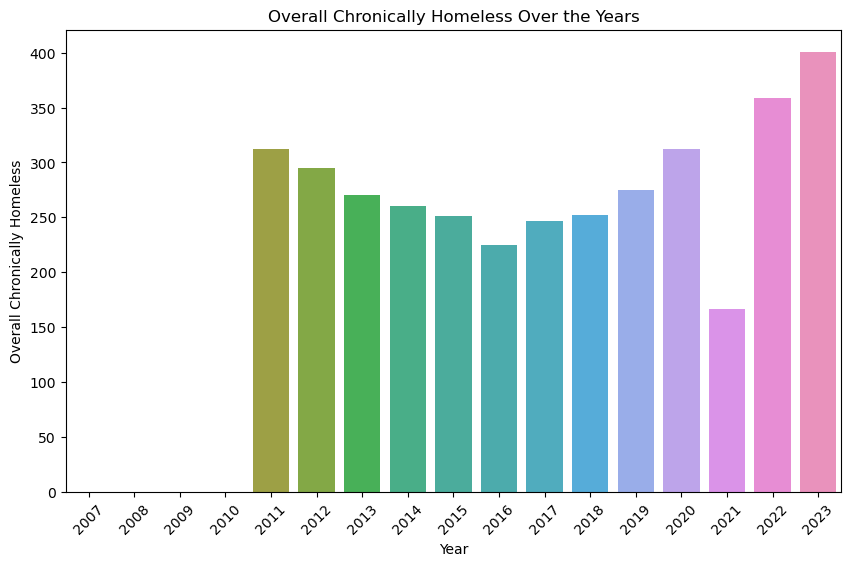

In [126]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Year', y='Overall Chronically Homeless', data=PitCount_07_23, ci=None)  # ci=None disables error bars

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Chronically Homeless Over the Years')
plt.xlabel('Year')
plt.ylabel('Overall Chronically Homeless')

# Save the image
plt.savefig('chronically_homeless_07_23.png')

# Show plot
plt.show()

Chronically homeless population was not being counted for until 2011. While there was a decrease during the Covid-19 era we see that this population has only grown.

## New Datasets Creation

Creating specific datasets for better visualizations and analysis..

1. Dataset: general_homeless_cols
    - The goal is to have a dataset that all the commonly column used in all the Pit Counts.
    - This will help with identifying trends.
2. Dataset: chronic_dataset
    - The goal with this dataset is to explore the chroniclly homeless population.

In [127]:
# Define the list of common columns among all datasets.
columns_to_keep = [
    'State_Territory',
    'CoC Number',
    'CoC Name',
    'Count Types',
    'Year',
    'Overall Homeless',
    'Overall Homeless Individuals',
    'Overall Homeless People in Families',
    'Overall Homeless Family Households',
    'Overall Chronically Homeless Individuals',
    'Unsheltered Homeless',
    'Unsheltered Chronically Homeless Individuals',
    'Unsheltered Homeless Individuals',
    'Unsheltered Homeless People in Families',
    'Unsheltered Homeless Family Households',
    'Sheltered Total Homeless Individuals',
    'Sheltered Total Chronically Homeless Individuals',
    'Sheltered Total Homeless People in Families',
    'Sheltered ES Homeless Individuals',
    'Sheltered ES Homeless',
    'Sheltered ES Homeless Family Households',
    'Sheltered ES Homeless People in Families',
    'Sheltered Total Homeless Family Households',
    'Sheltered Total Homeless',
    'Sheltered TH Homeless',
    'Sheltered TH Homeless Individuals',
    'Sheltered TH Homeless People in Families',
    'Sheltered TH Homeless Family Households'
]

# Create a new DataFrame with the specified columns
general_homeless_cols = PitCount_07_23[columns_to_keep].copy()

# Save the new dataset to a CSV file
general_homeless_cols.to_csv("general_homeless_cols.csv", index=False)

general_homeless_cols.head()

,State_Territory,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless Individuals,Overall Homeless People in Families,Overall Homeless Family Households,Overall Chronically Homeless Individuals,...,Sheltered ES Homeless Individuals,Sheltered ES Homeless,Sheltered ES Homeless Family Households,Sheltered ES Homeless People in Families,Sheltered Total Homeless Family Households,Sheltered Total Homeless,Sheltered TH Homeless,Sheltered TH Homeless Individuals,Sheltered TH Homeless People in Families,Sheltered TH Homeless Family Households
0,Alaska,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,848.0,280.0,87.0,114.0,...,548.0,654.0,34.0,106.0,87.0,973.0,319.0,145.0,174.0,53.0
1,Alaska,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,506.0,211.0,78.0,102.0,...,244.0,363.0,46.0,119.0,78.0,578.0,215.0,123.0,92.0,32.0
2,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,932.0,160.0,60.0,89.0,...,435.0,540.0,38.0,105.0,60.0,875.0,304.0,249.0,55.0,22.0
3,Alabama,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,426.0,180.0,57.0,65.0,...,121.0,196.0,24.0,75.0,52.0,341.0,145.0,58.0,87.0,28.0
4,Alabama,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,155.0,0.0,0.0,24.0,...,27.0,27.0,0.0,0.0,0.0,133.0,106.0,106.0,0.0,0.0


In [128]:
general_homeless_cols.shape

(6516, 28)

In [129]:
general_homeless_cols.isnull().sum()

State_Territory                                      0
CoC Number                                           0
CoC Name                                             0
Count Types                                          0
Year                                                 0
Overall Homeless                                     0
Overall Homeless Individuals                         0
Overall Homeless People in Families                  0
Overall Homeless Family Households                   0
Overall Chronically Homeless Individuals             0
Unsheltered Homeless                                 0
Unsheltered Chronically Homeless Individuals        39
Unsheltered Homeless Individuals                    25
Unsheltered Homeless People in Families             30
Unsheltered Homeless Family Households              30
Sheltered Total Homeless Individuals                 0
Sheltered Total Chronically Homeless Individuals     0
Sheltered Total Homeless People in Families          0
Sheltered 

General_Homeless_dataset created.

Create the Chronically Homeless Dataset. Include the the first 7 columns that are necessary for all analysis.

In [130]:
# Filter columns containing "Chronically" in their names
chronic_columns = PitCount_07_23.filter(like='Chronically')

# Specify the columns for the new dataset
columns_to_keep = [
    'State_Territory',  # Assuming the State column has been already mapped to full state names
    'CoC Number',
    'CoC Name',
    'Count Types',
    'Year',
    'Overall Homeless',
    'Overall Homeless Individuals'
]

# Create a new DataFrame starting with the specified columns and including the chronic_columns
chronic_dataset = PitCount_07_23[columns_to_keep].join(chronic_columns)

# Display the first few rows of the new dataset
chronic_dataset.head()


,State_Territory,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless Individuals,Overall Chronically Homeless,Sheltered ES Chronically Homeless,Sheltered SH Chronically Homeless,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered ES Chronically Homeless Individuals,Sheltered SH Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered ES Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families
0,Alaska,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,848.0,116.0,72.0,0.0,...,44.0,114.0,70.0,0.0,70.0,44.0,2.0,2.0,2.0,0.0
1,Alaska,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,506.0,141.0,86.0,0.0,...,55.0,102.0,47.0,0.0,47.0,55.0,39.0,39.0,39.0,0.0
2,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,932.0,92.0,27.0,4.0,...,61.0,89.0,24.0,4.0,28.0,61.0,3.0,3.0,3.0,0.0
3,Alabama,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,426.0,65.0,9.0,0.0,...,56.0,65.0,9.0,0.0,9.0,56.0,0.0,0.0,0.0,0.0
4,Alabama,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,155.0,24.0,10.0,0.0,...,14.0,24.0,10.0,0.0,10.0,14.0,0.0,0.0,0.0,0.0


In [131]:
chronic_dataset.shape

(6516, 21)

In [132]:
chronic_dataset.isnull().sum()

State_Territory                                               0
CoC Number                                                    0
CoC Name                                                      0
Count Types                                                   0
Year                                                          0
Overall Homeless                                              0
Overall Homeless Individuals                                  0
Overall Chronically Homeless                               1530
Sheltered ES Chronically Homeless                          1530
Sheltered SH Chronically Homeless                          1148
Sheltered Total Chronically Homeless                       1530
Unsheltered Chronically Homeless                           1567
Overall Chronically Homeless Individuals                      0
Sheltered ES Chronically Homeless Individuals               766
Sheltered SH Chronically Homeless Individuals              1148
Sheltered Total Chronically Homeless Ind

Some columns have many null values.

Find if the null values in this dataset are coming from specific years, knowing that all the datasets have different number of columns.

In [133]:
# Filter the dataset to include only rows with null values
chronic_null_values_dataset = chronic_dataset[chronic_dataset.isnull().any(axis=1)]

# Extract the unique years from the filtered dataset
unique_years_with_null = chronic_null_values_dataset['Year'].unique()

# Print the unique years with null values
print("Unique years with null values:")
print(unique_years_with_null)
print('  ')
print("Shape of chronic null values")
print(chronic_null_values_dataset.shape)
print("  ")
chronic_null_values_dataset.head()

Unique years with null values:
[2021 2007 2008 2009 2010]
  
Shape of chronic null values
(1574, 21)
  


,State_Territory,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless Individuals,Overall Chronically Homeless,Sheltered ES Chronically Homeless,Sheltered SH Chronically Homeless,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered ES Chronically Homeless Individuals,Sheltered SH Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered ES Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families
1550,Alabama,AL-505,Gadsden/Northeast Alabama CoC,Sheltered and Unsheltered Count,2021,537.0,523.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
1576,California,CA-515,"Roseville, Rocklin/Placer County CoC",Sheltered and Unsheltered Count,2021,708.0,249.0,240.0,93.0,0.0,...,147.0,85.0,85.0,0.0,85.0,NaN,8.0,8.0,8.0,NaN
1581,California,CA-520,Merced City & County CoC,Sheltered and Unsheltered Count,2021,835.0,670.0,21.0,21.0,0.0,...,NaN,21.0,21.0,0.0,21.0,NaN,0.0,0.0,0.0,NaN
1591,California,CA-531,Nevada County CoC,Sheltered-Only Count,2021,401.0,180.0,121.0,69.0,0.0,...,52.0,66.0,66.0,0.0,66.0,NaN,3.0,3.0,3.0,NaN
1615,Florida,FL-502,"St. Petersburg, Clearwater, Largo/Pinellas Cou...",Sheltered and Unsheltered Count,2021,2307.0,933.0,213.0,180.0,33.0,...,NaN,207.0,174.0,33.0,207.0,NaN,6.0,6.0,6.0,NaN


As the exploratory dataset show, chorincally homeless variables only started during 2011 onwards. Update the datset so that it does not contain any of the prior years.

In [136]:
chronic_dataset = chronic_dataset[chronic_dataset["Year"] >= 2011]

print(chronic_dataset.shape)

chronic_dataset.isnull().sum()

(4986, 21)


State_Territory                                             0
CoC Number                                                  0
CoC Name                                                    0
Count Types                                                 0
Year                                                        0
Overall Homeless                                            0
Overall Homeless Individuals                                0
Overall Chronically Homeless                                0
Sheltered ES Chronically Homeless                           0
Sheltered SH Chronically Homeless                           0
Sheltered Total Chronically Homeless                        0
Unsheltered Chronically Homeless                           37
Overall Chronically Homeless Individuals                    0
Sheltered ES Chronically Homeless Individuals               0
Sheltered SH Chronically Homeless Individuals               0
Sheltered Total Chronically Homeless Individuals            0
Unshelte

In [ ]:
#S

Save the dataset.

In [135]:
# Save the new dataset to a CSV file
chronic_dataset.to_csv("chronic_dataset.csv", index=False)

## SQL Exploration

Ideas to explore:
1. Average homeless population since 2007, in descending order.
    - By State
    - By CoC Name
2. Ratio of Overall Chronically Homeless Individuals to Overall Homeless Individuals.
    - By State
    - By CoC Name
    - By Year
3. Growth of Overall Chronically Homeless from 2011 to 2023
4. CoCs with the Highest Record Homeless Population.
5. Percentage of Overall Homeless Individuals that have been provided shelter
    - By State
    - By Year
6. Percentage of Overall Chronically Homeless Individuals that have been provided shelter.
    - By State
    - By Year

1. Average homeless population since 2007, in descending order.
    - By State
    - By CoC Name

In [70]:
#import SQL
from pandasql import sqldf
#Import the SQL Query into an image for Read Me section
import dataframe_image as dfi

# Define the SQL query

query_per_state = """
    SELECT State_Territory, AVG("Overall Homeless") AS Avg_Homeless
    FROM general_homeless_cols
    GROUP BY State_Territory
    ORDER BY Avg_Homeless DESC
    LIMIT 5
"""

query_per_coc_name = """
    SELECT "CoC Name", AVG("Overall Homeless") AS Avg_Homeless
    FROM general_homeless_cols
    GROUP BY "CoC Name"
    ORDER BY Avg_Homeless DESC
    LIMIT 5
"""

# Execute the SQL query
result_1 = sqldf(query_per_state)
result_2 = sqldf(query_per_coc_name)

# Print the result
print("Average Homeless population since 2007, per state:")
print(result_1)
print("  ")
print("Average Homeless population since 2007, per CoC:")
print(result_2)


# Convert result into png images
#dfi.export(result_1, "1_result_state.png")
dfi.export(result_2, "1_result_coc")



Average Homeless population since 2007, per state:
        State_Territory  Avg_Homeless
0  District of Columbia   6447.823529
1              Colorado   3755.145455
2               Arizona   3746.666667
3            Washington   3539.784314
4                Hawaii   3125.735294
  
Average Homeless population since 2007, per CoC:
                        CoC Name  Avg_Homeless
0              New York City CoC  65977.705882
1  Los Angeles City & County CoC  44667.411765
2        Seattle/King County CoC  10032.941176
3     Texas Balance of State CoC   9864.352941
4  San Diego City and County CoC   8394.941176


[0505/090248.397536:WARNING:runtime_features.cc(730)] AttributionReportingCrossAppWeb cannot be enabled in this configuration. Use --enable-features=ConversionMeasurement,AttributionReportingCrossAppWeb in addition.
[0505/090248.555935:WARNING:runtime_features.cc(730)] AttributionReportingCrossAppWeb cannot be enabled in this configuration. Use --enable-features=ConversionMeasurement,AttributionReportingCrossAppWeb in addition.
91671 bytes written to file /var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/tmp1xkrlgk3/temp.png


2. Ratio of Overall Chronically Homeless Individuals to Overall Homeless Individuals.
    - By State
    - By CoC Name
    - By Year

In [79]:
# Ratio of Overall Chronically Homeless Individuals to Overall Homeless Individuals.
chronical_over_homeless_by_state = """
    SELECT State_Territory, ROUND(AVG("Overall Chronically Homeless Individuals"/ "Overall Homeless Individuals"),2) AS "Ratio"
    FROM general_homeless_cols
    GROUP BY State_Territory
    Order by "Ratio" DESC
    LIMIT 5
"""

chronical_over_homeless_by_coc_name = """
    SELECT "CoC Name", ROUND(AVG("Overall Chronically Homeless Individuals"/ "Overall Homeless Individuals"),2) AS "Ratio"
    FROM general_homeless_cols
    GROUP BY "CoC Name"
    Order by "Ratio" DESC
    LIMIT 5
"""

chronical_over_homeless_by_year = """
    SELECT Year, ROUND(AVG("Overall Chronically Homeless Individuals"/ "Overall Homeless Individuals"),2) AS "Ratio"
    FROM general_homeless_cols
    GROUP BY Year
    Order by "Ratio" DESC
    LIMIT 5
"""


result_s = sqldf(chronical_over_homeless_by_state)
result_coc = sqldf(chronical_over_homeless_by_coc_name)
result_year = sqldf(chronical_over_homeless_by_year)

print("By state, Number of chronically homeless Individuals for every Homeless Individual")
print(result_s)
print("  ")
print("By CoC Name, Number of chronically homeless Individuals for every Homeless Individual")
print(result_coc)
print("   ")
print("By Year, Number of chronically homeless Individuals for every Homeless Individual")
print(result_year)


By state, Number of chronically homeless Individuals for every Homeless Individual
        State_Territory  Ratio
0           Puerto Rico   0.49
1  District of Columbia   0.44
2        Virgin Islands   0.43
3            New Mexico   0.39
4                Oregon   0.34
  
By CoC Name, Number of chronically homeless Individuals for every Homeless Individual
                                  CoC Name  Ratio
0      Hot Springs/South West Arkansas CoC   0.75
1                      Imperial County CoC   0.58
2  Puerto Rico Balance of Commonwealth CoC   0.53
3                         Pasco County CoC   0.51
4                   Framingham/Waltham CoC   0.50
   
By Year, Number of chronically homeless Individuals for every Homeless Individual
   Year  Ratio
0  2008   0.29
1  2007   0.29
2  2009   0.27
3  2010   0.26
4  2023   0.25


In [80]:
# Save DataFrames as images
dfi.export(result_s, '2_result_s.png')
dfi.export(result_coc, '2_result_coc.png')
dfi.export(result_year, '2_result_year.png')


[0505/094159.997656:WARNING:runtime_features.cc(730)] AttributionReportingCrossAppWeb cannot be enabled in this configuration. Use --enable-features=ConversionMeasurement,AttributionReportingCrossAppWeb in addition.
[0505/094200.176610:WARNING:runtime_features.cc(730)] AttributionReportingCrossAppWeb cannot be enabled in this configuration. Use --enable-features=ConversionMeasurement,AttributionReportingCrossAppWeb in addition.
61531 bytes written to file /var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/tmpna7fjyma/temp.png
[0505/094200.775924:WARNING:runtime_features.cc(730)] AttributionReportingCrossAppWeb cannot be enabled in this configuration. Use --enable-features=ConversionMeasurement,AttributionReportingCrossAppWeb in addition.
[0505/094200.814234:WARNING:runtime_features.cc(730)] AttributionReportingCrossAppWeb cannot be enabled in this configuration. Use --enable-features=ConversionMeasurement,AttributionReportingCrossAppWeb in addition.
79352 bytes written to file /var/folde

3. Growth of Overall Chronically Homeless from 2011 to 2023

    P.S. Overall Chronically homeless criteria only started in 2011.

In [73]:
#Growth of Overall Chronically Homeless from 2011 to 2023
query_average_growth_by_year = """

    SELECT State_Territory,
       ROUND(((POWER(
               AVG("Overall Chronically Homeless") / AVG(CASE WHEN Year = 2011 THEN "Overall Chronically Homeless" END), 
               1.0 / 12) - 1) * 100), 1) AS CAGR_Numeric
    FROM chronic_dataset
    WHERE Year BETWEEN 2011 AND 2023
    GROUP BY State_Territory
    ORDER BY CAGR_Numeric DESC;
"""

result_4 = sqldf(query_average_growth_by_year)
print(result_4)



             State_Territory  CAGR_Numeric
0               South Dakota          11.7
1                    Vermont           6.0
2                   Delaware           5.9
3                 Washington           5.2
4                   New York           4.1
5               North Dakota           3.6
6               Rhode Island           3.5
7                     Hawaii           3.5
8                   Colorado           3.1
9                 New Jersey           2.9
10             New Hampshire           2.5
11                    Alaska           2.2
12                     Maine           2.1
13                      Utah           1.9
14             Massachusetts           1.5
15                   Wyoming           1.3
16            South Carolina           0.8
17                California           0.7
18                 Wisconsin           0.5
19                  Oklahoma           0.5
20                    Oregon           0.4
21                    Kansas           0.2
22         

In [75]:
#CoC Name with the Highest Record Homeless Population.
chronic_dataset.columns = chronic_dataset.columns.str.replace(' ', '_')

# Define the SQL query
query_largest_homeless_pop = """
SELECT Year, CoC_Name, MAX("Overall_Homeless") AS Larget_Homeless_Population_Recorded
FROM chronic_dataset
GROUP BY CoC_Name
ORDER BY Larget_Homeless_Population_Recorded DESC
LIMIT 5;
"""

query_smallest_homeless_pop = """
SELECT Year, CoC_Name, MAX("Overall_Homeless") AS Larget_Homeless_Population_Recorded
FROM chronic_dataset
GROUP BY CoC_Name
ORDER BY Larget_Homeless_Population_Recorded ASC
LIMIT 5;
"""

# Execute the SQL query
result_highest_homeless_pop = sqldf(query_largest_homeless_pop)
result_smallest_homeless_pop = sqldf(query_smallest_homeless_pop)

# Print the result
print(result_highest_homeless_pop)
print(result_smallest_homeless_pop)
# Export the images as png
dfi.export(result_highest_homeless_pop,"4_result_highest_population.png")
dfi.export(result_smallest_homeless_pop,"4_result_smallest_homeless_pop")

   Year                       CoC_Name  Larget_Homeless_Population_Recorded
0  2023              New York City CoC                              88025.0
1  2023  Los Angeles City & County CoC                              71320.0
2  2007                    Detroit CoC                              18062.0
3  2009     Texas Balance of State CoC                              15327.0
4  2023        Seattle/King County CoC                              14149.0
   Year                                    CoC_Name  \
0  2007         Hot Springs/South West Arkansas CoC   
1  2007                           Putnam County CoC   
2  2009                Johnson, Pope, Yell Counties   
3  2010  Boone, Baxter, Marion, Newton Counties CoC   
4  2012  Fulton, Montgomery, Schoharie Counties CoC   

   Larget_Homeless_Population_Recorded  
0                                  4.0  
1                                 31.0  
2                                 40.0  
3                                 66.0  
4       

[0505/090347.897171:WARNING:runtime_features.cc(730)] AttributionReportingCrossAppWeb cannot be enabled in this configuration. Use --enable-features=ConversionMeasurement,AttributionReportingCrossAppWeb in addition.
[0505/090348.050541:WARNING:runtime_features.cc(730)] AttributionReportingCrossAppWeb cannot be enabled in this configuration. Use --enable-features=ConversionMeasurement,AttributionReportingCrossAppWeb in addition.
98451 bytes written to file /var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/tmppujv3kaw/temp.png


5. Percentage of Overall Homeless Individuals that are have been provided shelter
    - By State
    - By Year

In [83]:
# Define the SQL query
query_highest_sheltered_homeless_individuals = """ 
    SELECT State_Territory, 
       ROUND(AVG(("Sheltered Total Homeless Individuals" * 1.0) / "Overall Homeless Individuals") * 100, 1) || '%' AS Average_Sheltered_Percentage
    FROM general_homeless_cols
    WHERE "Overall Homeless Individuals" > 0
    GROUP BY State_Territory
    ORDER BY Average_Sheltered_Percentage DESC
    LIMIT 6;

"""

query_lowest_sheltered_homeless_individuals = """ 
    SELECT State_Territory, 
       ROUND(AVG(("Sheltered Total Homeless Individuals" * 1.0) / "Overall Homeless Individuals") * 100, 1) || '%' AS Average_Sheltered_Percentage
    FROM general_homeless_cols
    WHERE "Overall Homeless Individuals" > 0
    GROUP BY State_Territory
    ORDER BY Average_Sheltered_Percentage ASC
    LIMIT 6;

"""

query_highest_sheltered_homeless_individuals_by_year = """ 
    SELECT Year, 
       ROUND(AVG(("Sheltered Total Homeless Individuals" * 1.0) / "Overall Homeless Individuals") * 100, 1) || '%' AS Average_Sheltered_Percentage
    FROM general_homeless_cols
    WHERE "Overall Homeless Individuals" > 0
    GROUP BY Year
    ORDER BY Average_Sheltered_Percentage DESC
    LIMIT 6;

"""

query_lowest_sheltered_homeless_individuals_by_year = """ 
    SELECT Year, 
       ROUND(AVG(("Sheltered Total Homeless Individuals" * 1.0) / "Overall Homeless Individuals") * 100, 1) || '%' AS Average_Sheltered_Percentage
    FROM general_homeless_cols
    WHERE "Overall Homeless Individuals" > 0
    GROUP BY Year
    ORDER BY Average_Sheltered_Percentage ASC
    LIMIT 6;

"""

# Execute the SQL query
highest_sheltered_result = sqldf(query_highest_sheltered_homeless_individuals)
lowest_sheltered_result = sqldf(query_lowest_sheltered_homeless_individuals)
highest_sheltered_result_by_year = sqldf(query_highest_sheltered_homeless_individuals_by_year)
lowest_sheltered_result_by_year = sqldf(query_lowest_sheltered_homeless_individuals_by_year)

# Print the results
print(highest_sheltered_result)
print(lowest_sheltered_result)
print(highest_sheltered_result_by_year)
print(lowest_sheltered_result_by_year)

# Export results as png files
dfi.export(highest_sheltered_result, "5_highest_sheltered_result.png")
dfi.export(lowest_sheltered_result, "5_lowest_sheltered_result.png")
dfi.export(highest_sheltered_result_by_year, "5_highest_sheltered_result_by_year.png")
dfi.export(lowest_sheltered_result_by_year, "5_lowest_sheltered_result_by_year.png")



  State_Territory Average_Sheltered_Percentage
0           Maine                        94.6%
1        Delaware                        89.9%
2    Rhode Island                        89.8%
3       Wisconsin                        88.4%
4            Iowa                        87.9%
5        Nebraska                        86.7%
            State_Territory Average_Sheltered_Percentage
0                      Guam                        18.6%
1            Virgin Islands                        19.4%
2  Northern Mariana Islands                        19.5%
3               Puerto Rico                        30.2%
4                    Hawaii                        32.1%
5                California                        33.9%
   Year Average_Sheltered_Percentage
0  2021                        84.2%
1  2014                        69.6%
2  2015                        67.6%
3  2016                        67.5%
4  2013                        66.4%
5  2009                        65.9%
   Year Avera

[0505/085344.511219:WARNING:runtime_features.cc(730)] AttributionReportingCrossAppWeb cannot be enabled in this configuration. Use --enable-features=ConversionMeasurement,AttributionReportingCrossAppWeb in addition.
[0505/085344.649088:WARNING:runtime_features.cc(730)] AttributionReportingCrossAppWeb cannot be enabled in this configuration. Use --enable-features=ConversionMeasurement,AttributionReportingCrossAppWeb in addition.
73494 bytes written to file /var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/tmp6_1ol3ab/temp.png
[0505/085345.228265:WARNING:runtime_features.cc(730)] AttributionReportingCrossAppWeb cannot be enabled in this configuration. Use --enable-features=ConversionMeasurement,AttributionReportingCrossAppWeb in addition.
[0505/085345.267866:WARNING:runtime_features.cc(730)] AttributionReportingCrossAppWeb cannot be enabled in this configuration. Use --enable-features=ConversionMeasurement,AttributionReportingCrossAppWeb in addition.
75396 bytes written to file /var/folde

## Explanatory Visualization via Tableau

#### Ideas:
1. US Map sharing Overall Homeless data per state over the past 17 years.
2. Overall Homeless and how many have been sheltered.
3. Overall Chronically Homeless and how many have been sheltered.

In [76]:
df = pd.read_csv("PitCount_2023.csv")

df.columns

Index(['CoC Number', 'CoC Name', 'CoC Category', 'Count Types',
       'Overall Homeless', 'Overall Homeless - Under 18',
       'Overall Homeless - Age 18 to 24', 'Overall Homeless - Age 25 to 34',
       'Overall Homeless - Age 35 to 44', 'Overall Homeless - Age 45 to 54',
       ...
       'Sheltered ES Homeless Parenting Youth Age 18-24',
       'Sheltered TH Homeless Parenting Youth Age 18-24',
       'Sheltered Total Homeless Parenting Youth Age 18-24',
       'Unsheltered Homeless Parenting Youth Age 18-24',
       'Overall Homeless Children of Parenting Youth',
       'Sheltered ES Homeless Children of Parenting Youth',
       'Sheltered TH Homeless Children of Parenting Youth',
       'Sheltered Total Homeless Children of Parenting Youth',
       'Unsheltered Homeless Children of Parenting Youth', 'Year'],
      dtype='object', length=646)

# Machine Learning Models

In [ ]:
general_homeless_cols.isnull().sum()

In [ ]:
general_homeless_cols.columns

## Hierarchical Clustering - Count Types

In [ ]:
general_homeless_cols_2 = general_homeless_cols.drop('CoC Number', axis=1)

general_homeless_cols_2.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# One-hot encode the categorical columns
categorical_columns = ['State_Territory', 'CoC Name']
df_encoded = pd.get_dummies(general_homeless_cols_2, columns=categorical_columns)

# Exclude 'Count Types' which you need to keep as labels or for other purposes
df_encoded = df_encoded.drop(columns=['Count Types'])

# Standardize the data (now including the one-hot encoded columns)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

print(scaled_data)

In [ ]:
# We will use Ward linkage and let the algorithm determine the number of clusters
clustering = AgglomerativeClustering(linkage='ward').fit(scaled_data)

# Plotting a dendrogram to visualize the hierarchical clustering
# This helps in determining the optimal number of clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Since the dataset now includes many dimensions, we should reduce dimensions to plot.
# Let's use PCA to reduce dimensions to 2D for visualization.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plotting the clusters in 2D space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=clustering.labels_, palette='Set1', legend='full')
plt.title('Hierarchical Clustering in 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Analyzing the structure

In [ ]:
general_homeless_cols_2['Cluster'] = clustering.labels_

# Calculate mean for all numerical columns by cluster
cluster_means = general_homeless_cols_2.groupby('Cluster').mean()

# Calculate counts or modes for categorical columns by cluste
cluster_modes = general_homeless_cols_2.groupby('Cluster').agg(pd.Series.mode)  # You may need to adjust this if modes are multi-modal


In [ ]:
cluster_modes.head()

### Hierarchical Clustering

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Drop non-numeric columns
numeric_df = general_homeless_cols.drop(columns=['State_Territory', 'CoC Number', 'CoC Name', 'Count Types'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# We will use Ward linkage and let the algorithm determine the number of clusters
clustering = AgglomerativeClustering(linkage='ward').fit(scaled_data)

# Plotting a dendrogram to visualize the hierarchical clustering
# This helps in determining the optimal number of clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=clustering.labels_, palette='Set1', legend='full')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Time Series

Model Assumption: 
- Stationary: The time series has its statistical properties remain constant across time.
ARIMA: Is a general class of models
- Three components: AR+I+MA (p, d, q)
- AR (Auo Regressive): the time series is lineraly regressed on its own past value.
    - p: the number of past values included in the AR model
- I (Integrated): if not stationary, the time series can be differenced to become stationary. 
    - d: he number of times the time series is differenced
- MA (Moving Average): the time series is 'regressed' on the past forecast erros.
    - q: the number of past forecast errors included in the MA model.

Rule of thumb in selecting (p,d,q) values:
- IF the PACF plot has a significant spike at lag p, but not beyond and the ACF plot decays more gradually. This may suggest an ARIMA (p,d,0) model.
- If the ACF plot has a significant spike at lag q, but not beyond and PACF plot decays more gradually. This may suggest an ARIMA (0,d,q) model.

(PACF measures the balances variance of the lag.)

ACF Plot and PACF Plot
- ACF is the correlation of the time series with tis lags.
- PACF is hte partial correlation of the time series with its lags, after removing the effects of lower-order-lags between them. 


1. No Duplicate values
    - Deal with duplicates by pivoting the table. Categories like Office Supplies and Toilet paper become columns of their own.
2. No Null Values


- Setting the Index
    - Having a column the indicates the day of the week, like monday = 0, Sunday = 6. so we can find out if the weekends had more sales.

- Resampling
    - UpSampling: Going from days to years
    - Down Sampling: Going to Years to days.
    - Changing the frequency from years to months to days to months to years etc.

- Variable Transformation

- Stationary Models
    - A stationary model has the same mean and variance over time.
    - For a dataset to be stationary it must have these four properties:
        - Mean stay contact
            - Mean stays consisent through out. Rolling average.
        - Variance stay consistent over time
        - Consistent autocorrelation structure through out the series.
            - Autocorelation is a key concept in time series.
            - Means todays measurament is dependant on a past values.
            - Time interval between correlated values is called a **Lag**  
        - No periodic component. 
            - 


### ARIMA Model

In [ ]:
general_homeless_cols.head()

In [ ]:
general_homeless_cols = general_homeless_cols.drop(columns=['CoC Number'])

general_homeless_cols.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns
categorical_columns = ['State_Territory', 'CoC Name', 'Count Types']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical data
encoded_categorical = encoder.fit_transform(general_homeless_cols[categorical_columns])

# Create a DataFrame from the encoded variables
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original data (excluding the original categorical columns)
general_data_preprocessed = pd.concat([general_homeless_cols.drop(columns=categorical_columns), encoded_categorical_df], axis=1)

general_data_preprocessed.head()

In [ ]:
# Set 'Year' as the datetime index
general_data_preprocessed['Year'] = pd.to_datetime(general_data_preprocessed['Year'], format='%Y')
general_data_preprocessed.set_index('Year', inplace=True)

general_data_preprocessed.head()

In [ ]:
import matplotlib.pyplot as plt

# Plotting the 'Overall Homeless' data
plt.figure(figsize=(10, 5))
plt.plot(general_data_preprocessed.index, general_data_preprocessed['Overall Homeless'], marker='o', linestyle='-')
plt.title('Trends in Overall Homelessness Over Time')
plt.xlabel('Year')
plt.ylabel('Overall Homeless')
plt.grid(True)
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

general_data_preprocessed = general_data_preprocessed[general_data_preprocessed.index.year != general_data_preprocessed.index.max().year]

# Filter columns for each CoC and predict
coc_columns = [col for col in general_data_preprocessed.columns if 'CoC Name_' in col]
predictions = {}

# Initialize a plot for visual comparison
plt.figure(figsize=(10, 6))

for coc in coc_columns:
    # Selecting the series for each CoC
    series = general_data_preprocessed[general_data_preprocessed[coc] == 1]['Overall Homeless']
    
    # Check if the series has enough data
    if len(series) > 3:  # Ensure there are more than 3 data points
        try:
            # Fit ARIMA model
            model = ARIMA(series, order=(3,1,1))
            model_fit = model.fit()
            
            # Predict the next period (2024)
            forecast = model_fit.forecast(steps=1)
            predictions[coc] = forecast.iloc[0]  # Use iloc to access the forecast safely
            
            # Plotting historical and predicted values
            plt.plot(series.index, series, label=f'Historical {coc}')
            plt.scatter(series.index[-1] + pd.DateOffset(years=1), forecast.iloc[0], color='red')  # Point for 2024

        except Exception as e:
            print(f"Failed to model {coc} due to insufficient data or other errors: {str(e)}")

# Convert predictions dictionary to a DataFrame for better visualization
predictions_df = pd.DataFrame(list(predictions.items()), columns=['CoC Name', '2024 Predicted Overall Homeless'])


In [ ]:
predictions_df.tail()

In [ ]:
predictions_df["Year"] = 2024

predictions_df = predictions_df.rename(columns={'2024 Predicted Overall Homeless': 'Overall Homeless'})


predictions_df.head()

In [ ]:
general_homeless_cols.head()

In [ ]:
#Combine the two datasets with Year, CoC Name & Overall Homeless

predicted_subset = predictions_df[['Year', 'CoC Name', 'Overall Homeless']]
general_subset = general_homeless_cols[['Year', 'CoC Name', 'Overall Homeless']]

# Concatenate the two subsets into a new DataFrame
year_17_24 = pd.concat([predicted_subset, general_subset], ignore_index=True)

year_17_24.shape

In [ ]:

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(year_17_24['Year'], year_17_24['Overall Homeless'], marker='o', linestyle='-')
plt.title('Overall Homeless by Year')
plt.xlabel('Year')
plt.ylabel('Overall Homeless')
plt.grid(True)

plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

## XGBoost Model

In [ ]:
general_homeless_cols['Count Types'].unique()

In [ ]:
#drop CoC Number as it adds no significant vales to the dataset.
general_homeless_cols.drop(['CoC Number'], axis=1, inplace=True)

categorical_cols = ['State_Territory', 'CoC Name', 'Count Types']  # Adjust if different on your end

#One Hot Encode the categorical values.
homeless_data_encoded = pd.get_dummies(general_homeless_cols, columns=categorical_cols)


In [ ]:
homeless_data_encoded.head()

In [ ]:
homeless_data_encoded.isnull().sum().any()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#train test split
X = homeless_data_encoded.drop(['Overall Homeless', 'Year'], axis=1)
y = homeless_data_encoded['Overall Homeless']

# Train-test split: Here we use all data up to 2023 for training
train_X = X[homeless_data_encoded['Year'] <= 2022]
train_y = y[homeless_data_encoded['Year'] <= 2022]
test_X = X[homeless_data_encoded['Year'] == 2023]
test_y = y[homeless_data_encoded['Year'] == 2023]

# Initialize the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.4, learning_rate=0.1,
                         max_depth=5, alpha=10, n_estimators=100)

# Train the model
model.fit(train_X, train_y)


In [ ]:
# Make predictions for 2023
y_pred_2023 = model.predict(test_X)

# Evaluate the predictions for 2023
rmse_2023 = mean_squared_error(test_y, y_pred_2023, squared=False)
print("RMSE for 2023 predictions: ", rmse_2023)

print(y_pred_2023)

In [ ]:
# We'll use 2023 features as a proxy for 2024
features_2024 = test_X.copy()

# Predict for 2024
y_pred_2024 = model.predict(features_2024)

# For simplicity, let's assume you're just printing them out or handling them in a basic way for now
print("Predicted homeless counts for 2024: ", y_pred_2024)


In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = test_y - y_pred_2023

# Plot residuals
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2023, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
